# Workshop 1
Fabián González Vera A01367585
09/08/2023

## 2.3 CHALLENGE: Data management and Descriptive Statistics

## 2.3.1 Data collection and visualization

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
BTC=yf.download(tickers="BTC-USD", start="2017-01-01",interval="1mo")

[*********************100%***********************]  1 of 1 completed


In [3]:
BTC

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1191.099976,755.755981,970.403015,970.403015,5143971692
2017-02-01,970.940979,1200.390015,946.690979,1179.969971,1179.969971,4282761200
2017-03-01,1180.040039,1280.310059,903.713013,1071.790039,1071.790039,10872455960
2017-04-01,1071.709961,1347.910034,1061.089966,1347.890015,1347.890015,9757448112
2017-05-01,1348.300049,2763.709961,1348.300049,2286.409912,2286.409912,34261856864
...,...,...,...,...,...,...
2023-04-01,28473.332031,31005.607422,27070.849609,29268.806641,29268.806641,511540319004
2023-05-01,29227.103516,29820.126953,25878.429688,27219.658203,27219.658203,443473015479
2023-06-01,27218.412109,31389.539062,24797.167969,30477.251953,30477.251953,481734214225


In [4]:
BTC.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-01,28473.332031,31005.607422,27070.849609,29268.806641,29268.806641,511540319004
2023-05-01,29227.103516,29820.126953,25878.429688,27219.658203,27219.658203,443473015479
2023-06-01,27218.412109,31389.539062,24797.167969,30477.251953,30477.251953,481734214225
2023-07-01,30471.847656,31814.515625,28934.294922,29230.111328,29230.111328,382224489090
2023-08-01,29230.873047,30176.796875,28657.023438,29367.996094,29367.996094,138335078470


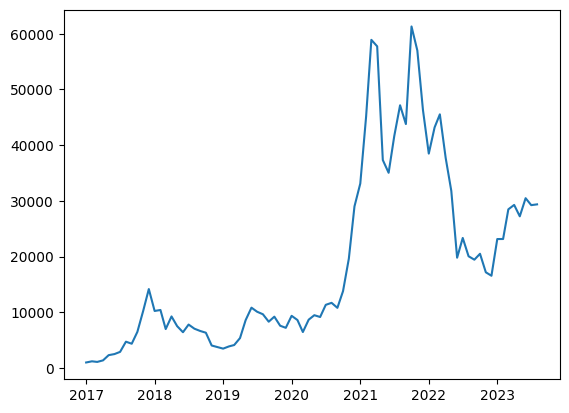

In [30]:

plt.plot(BTC["Adj Close"])
plt.show()

In [6]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80 entries, 2017-01-01 to 2023-08-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       80 non-null     float64
 1   High       80 non-null     float64
 2   Low        80 non-null     float64
 3   Close      80 non-null     float64
 4   Adj Close  80 non-null     float64
 5   Volume     80 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 4.4 KB


# 2.3.2 Data transformations

In [7]:
#2.3.2.3 Continuosly compounded returns
BTC["R"] = (BTC["Adj Close"] / BTC["Adj Close"].shift(1)) - 1
print(BTC["R"])

Date
2017-01-01         NaN
2017-02-01    0.215959
2017-03-01   -0.091680
2017-04-01    0.257606
2017-05-01    0.696288
                ...   
2023-04-01    0.027752
2023-05-01   -0.070011
2023-06-01    0.119678
2023-07-01   -0.040920
2023-08-01    0.004717
Name: R, Length: 80, dtype: float64


In [8]:
BTC["r"] = np.log(BTC['Adj Close']) - np.log(BTC['Adj Close'].shift(1))
BTCR = BTC[['R','r']].copy()

In [9]:
BTCR= BTCR.dropna()

In [10]:
#2.3.2.4 Descriptive statistics of returns

sumret = BTC["R"].describe()
sumret

count    79.000000
mean      0.070496
std       0.242288
min      -0.377688
25%      -0.077135
50%       0.017298
75%       0.234738
max       0.696288
Name: R, dtype: float64

In [11]:
BTCR[BTCR["R"]<-0.15]

,R,r
Date,,
2018-01-01,-0.277987,-0.325713
2018-03-01,-0.329333,-0.399482
2018-05-01,-0.188991,-0.209476
2018-11-01,-0.364116,-0.452739
2019-11-01,-0.177177,-0.195014
2020-03-01,-0.251278,-0.289387
2021-05-01,-0.353546,-0.436253
2021-12-01,-0.187684,-0.207865
2022-01-01,-0.168947,-0.185061


In [12]:
BTCR[BTCR["R"]>0.15].sort_values(by=['R'], ascending=False)

,R,r
Date,,
2017-05-01,0.696288,0.528442
2017-08-01,0.635768,0.492113
2019-05-01,0.602493,0.471561
2017-11-01,0.582091,0.458748
2017-10-01,0.490858,0.399352
2020-12-01,0.477732,0.390508
2020-11-01,0.424123,0.353556
2021-10-01,0.400267,0.336663
2023-01-01,0.398356,0.335297


In [13]:
print("The daily average return of Bitcoin is ", BTCR["r"].mean())
print("The daily variance of Bitcoin is ", BTCR["r"].var())
print("The daily standard deviation (volatility) of Bitcoin return is ", BTCR["r"].std())
print("The daily median return of Bitcoin is ",BTCR["r"].median())

The daily average return of Bitcoin is  0.043163915537141016
The daily variance of Bitcoin is  0.050685763015230624
The daily standard deviation (volatility) of Bitcoin return is  0.2251349884296766
The daily median return of Bitcoin is  0.01714972738881393


# 3.2 CHALLENGES: Histogram

Do a histogram for daily Bitcoin cc returns. Hints: use the plot.hist function for pandas dataframes, and the BTC dataframe.

[*********************100%***********************]  1 of 1 completed


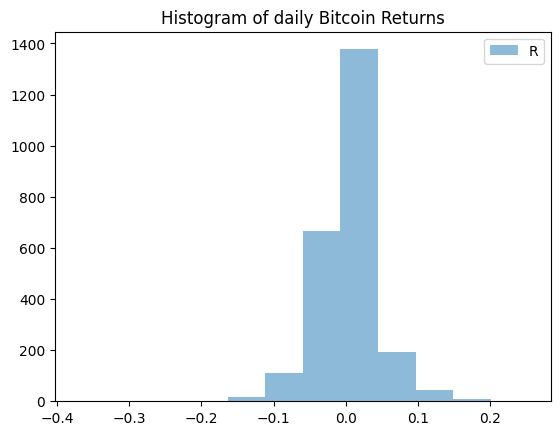

In [5]:
# 3.2 

BTC=yf.download(tickers="BTC-USD", start="2017-01-01",interval="1d")
# I calculate simple and cc return columns:
BTC["R"] = (BTC["Adj Close"] / BTC["Adj Close"].shift(1)) - 1
BTC["r"] = np.log(BTC['Adj Close']).diff(1)
# I keep a new object with only returns:
BTCR = BTC[['R','r']].copy()

plt.hist(BTC["R"],bins=12, alpha=0.5)
plt.title("Histogram of daily Bitcoin Returns")
plt.legend(["R"])
plt.show()

# Interpret the histogram with your own words and in CAPITAL LETTERS
MY INTERPRETATION OF THIS HISTOGRAM IS THAT BITCOIN RETURNS ARE QUITE VOLATILE AND THAT THEY TEND TO GO INTO THE NEGATIVE

# 5.2 CHALLENGE: Simulating the normal distribution

Use the mean and standard deviation of the historical cc returns of Bitcoin and simulate the same # of returns as the days we dowloaded in the BTCR dataframe.

In one plot show both, the real distribution of historical cc returns and the simulated normal distribution.

In [6]:
BTcr_mean = BTCR["r"].mean()
BTcr_std = BTCR["r"].std()

print(BTcr_mean)
print(BTcr_std)

0.0013977500748937467
0.039666136344520125


In [7]:
cr_size = len(BTCR['r'])
print(cr_size)

2418


In [8]:
rng = np.random.default_rng()
sim = rng.normal(loc=BTcr_mean, scale=BTcr_std, size=cr_size)

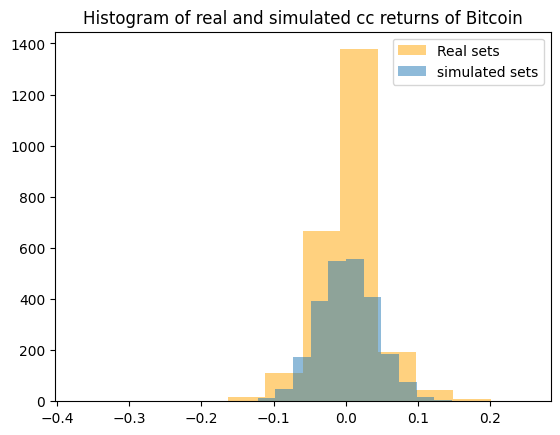

In [12]:
plt.hist(BTC["R"].to_numpy(),bins=12, alpha=0.5, color='orange')
plt.hist(sim,bins=12, alpha=0.5)
plt.title('Histogram of real and simulated cc returns of Bitcoin')
plt.legend(["Real sets","simulated sets"])
plt.show()

# DO YOU SEE A DIFFERENCE BEWEEN THE REAL VS THE SIMULATED RETURNS? BRIEFLY EXPLAIN.

